# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): A and B. The probability $f_A$ for decay A to happen is called its _branching ratio_.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, 'np.sum()' comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package 'from scipy.stats import beta‘.


## Tasks

### a)
For a fixed number N of observed decays, explain why the number of decays to channel A should follow a binomial distribution.

There are two possible outcomes for the experiment with fixed probabilities and the single events are independent. For a discrete number of observations the probability for finding an explicit number of events A follows a binomial distribution.

### b) 
Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_A|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_A|\vec{k})$?

$$P(f_A|\vec{k})  = \frac{L(\vec{k}|f_A) \pi(f_A) }{\int L(\vec{k}|f_A) \pi(f_A) df_A}$$

- normalization: $\int L(\vec{k}|f_A) \pi(f_A) df_A$
- $\pi(f_A)$: probability for value $f_A$ without including the measurements (a-priori)
- given a value $f_A$, $L(\vec{k}|f_A)$ gives the propability for oberserving the observations $\vec{k}$
$$L(\vec{k}|f_A) = \Pi_{i} f(k_i, f_A) = f_A^{\#A} \cdot (1-f_A)^{\#B}$$

### c+d)
c) Assuming a flat prior for the branching ratio $\pi(f_A)=1 \forall f_A\in[0,1]$ calculate and draw the posterior probability distribution for $f_A$ after measuring a single decay, which went to A.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "A", "B", "B", "A"

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def P(f_A, pi, k):
    n = len(k)
    nA = np.count_nonzero(k == 'A')
    nB = n - nA
    L = f_A**nA * (1-f_A)**nB
    normalization = np.sum((L*pi)[:-1]) / (len(f_A)-1)
    return L*pi / normalization

def plot(posterior):
    p_max = np.argmax(posterior)
    plt.plot(f_A_line, posterior, label = 'posterior probability distribution')
    plt.axvline(f_A_line[p_max], color='orange', label='maximum')
    plt.title('posterior')
    plt.xlabel('$f_A$')
    plt.legend()
    plt.show()

N=10000

Remark: We only approximate the integral with boxes using the left side value of each point.

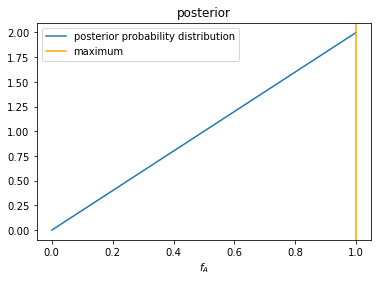

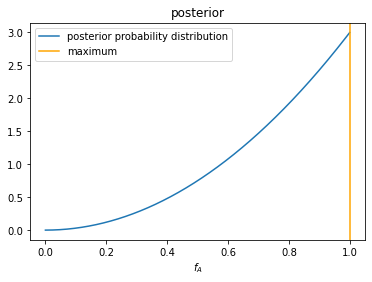

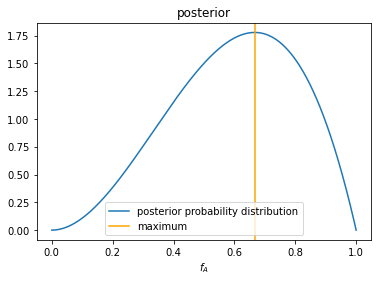

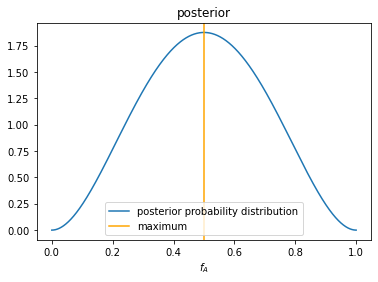

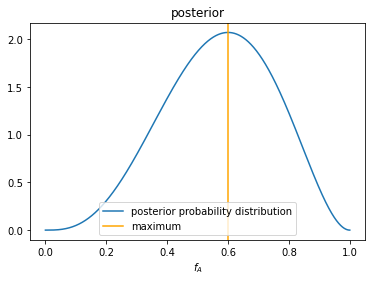

In [38]:
#c
f_A_line = np.linspace(0,1,N)
prior = np.ones(N)
k = np.array(['A'])

posterior = P(f_A_line, prior, k)
plot(posterior)

#d 
prior = posterior
ks = np.array(["A", "B", "B", "A"]).reshape(4,1)
for k in ks:
    posterior = P(f_A_line, prior, k)
    plot(posterior)
    prior = posterior

The maximum is at $f_A^{max} = \frac{\#A}{\#A + \#B}$

### e)
Calculate and draw the posterior after observing 100 decays, with 63 going to A.

The order of the observations is irrelevant: Define $f_B = 1 - f_A$. If we calculate the posterior step by step we get

1: $\pi_1(f_A) = P(f_A|k_1) \propto  f_1 \cdot \pi_0(f_A)$

2: $\pi_2(f_A) = P(f_A|k_2) \propto  f_2 \cdot \pi_1(f_A) \propto f_2 \cdot f_1 \cdot \pi_0(f_A)$

n: $\pi_n(f_A) = P(f_A|k_n) \propto  f_n \cdot \pi_{n-1}(f_A) \propto f_n \cdot ... \cdot f_1 \cdot \pi_0(f_A) = f_A^{\#A} \cdot (1-f_A)^{\#B} \cdot \pi_0(f_A)$

This is the same as
$$P(f_A|\vec{k}) \propto f_A^{\#A} \cdot (1-f_A)^{\#B} \cdot \pi_0(f_A)$$

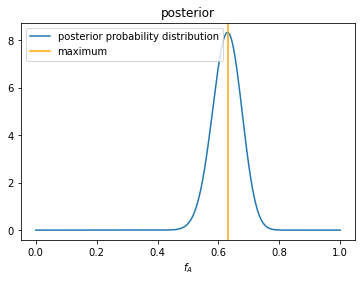

In [39]:
prior = np.ones(N)
k = np.array(["A" for _ in range(63)] + ["B" for _ in range(37)])
posterior = P(f_A_line, prior, k)
plot(posterior)

As expectetd the maximum is at $f_A^{max} = \frac{\#A}{\#A + \#B} = \frac{63}{100} = 0.63$